## Import Required Libraries

In [1]:
import sys
from pathlib import Path

try:
    import pandas as pd
    import matplotlib.pyplot as plt
except ImportError as e:
    print(f"Error: Required libraries not found: {e}")
    sys.exit(1)

print("✓ All libraries imported successfully")

✓ All libraries imported successfully


## Load the Data

In [2]:
def load_dataset(filepath: str) -> pd.DataFrame:
    path = Path(filepath)
    if not path.exists():
        raise FileNotFoundError(f"Dataset not found: {filepath}")
    return pd.read_csv(path)

try:
    train_df = load_dataset('../resources/Train_knight.csv')
    test_df = load_dataset('../resources/Test_knight.csv')
    print(f"✓ Train: {train_df.shape[0]} rows, Test: {test_df.shape[0]} rows")
except FileNotFoundError as e:
    print(f"✗ Error: {e}")
    sys.exit(1)

✓ Train: 398 rows, Test: 171 rows


## Print Original Data

In [3]:
print("Original Training Data:")
print(train_df.head())

Original Training Data:
   Sensitivity  Hability  Strength   Power  Agility  Dexterity  Awareness  \
0        11.80     17.26     75.26   431.9  0.09087    0.06232   0.028530   
1        19.81     22.15    130.00  1260.0  0.09831    0.10270   0.147900   
2        10.97     17.20     71.73   371.5  0.08915    0.11130   0.094570   
3        11.62     18.18     76.38   408.8  0.11750    0.14830   0.102000   
4        11.26     19.83     71.30   388.1  0.08511    0.04413   0.005067   

   Prescience  Reactivity  Midi-chlorien  ...  Evade   Stims  Sprint   Combo  \
0    0.016380      0.1847        0.06019  ...  24.49   86.00   562.0  0.1244   
1    0.094980      0.1582        0.05395  ...  30.88  186.80  2398.0  0.1512   
2    0.036130      0.1489        0.06640  ...  26.87   90.14   476.4  0.1391   
3    0.055640      0.1957        0.07255  ...  25.40   88.14   528.1  0.1780   
4    0.005664      0.1637        0.06343  ...  26.43   76.38   435.9  0.1108   

     Delay  Attunement  Empowere

## Normalize the Data

**Normalization formula (Min-Max)**: $x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}$

Where:
- $x$ = original value
- $x_{min}$ = minimum value in the column
- $x_{max}$ = maximum value in the column
- $x_{norm}$ = normalized value (range 0 to 1)

In [4]:
def normalize(df: pd.DataFrame) -> pd.DataFrame:
    """
    Normalize numeric columns to range [0, 1].
    Preserves non-numeric columns (like 'knight').
    """
    df_normalized = df.copy()
    
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    for col in numeric_cols:
        min_val = df[col].min()
        max_val = df[col].max()
        if max_val - min_val != 0:
            df_normalized[col] = (df[col] - min_val) / (max_val - min_val)
    
    return df_normalized

In [5]:
train_normalized = normalize(train_df)
test_normalized = normalize(test_df)

print("Normalized Training Data:")
print(train_normalized.head())
print("\nNormalized Test Data:")
print(test_normalized.head())

Normalized Training Data:
   Sensitivity  Hability  Strength     Power   Agility  Dexterity  Awareness  \
0     0.228075  0.255326  0.217469  0.122333  0.339141   0.135019   0.066909   
1     0.607175  0.420697  0.595743  0.473595  0.439627   0.275247   0.346857   
2     0.188793  0.253297  0.193076  0.096713  0.315910   0.305112   0.221787   
3     0.219556  0.286439  0.225209  0.112534  0.698811   0.433602   0.239212   
4     0.202518  0.342239  0.190104  0.103754  0.261345   0.071850   0.011883   

   Prescience  Reactivity  Midi-chlorien  ...     Evade     Stims    Sprint  \
0    0.089852    0.397475       0.237907  ...  0.379604  0.177250  0.092607   
1    0.521009    0.263636       0.092791  ...  0.574125  0.679267  0.543846   
2    0.198190    0.216667       0.382326  ...  0.452055  0.197868  0.071569   
3    0.305211    0.453030       0.525349  ...  0.407306  0.187908  0.084275   
4    0.031070    0.291414       0.313256  ...  0.438661  0.129339  0.061615   

      Combo     De

## Verify Normalization

In [6]:
print("Verification (should be min=0, max=1):")
print(f"Min of 'Empowered': {train_normalized['Empowered'].min():.6f}")
print(f"Max of 'Empowered': {train_normalized['Empowered'].max():.6f}")

Verification (should be min=0, max=1):
Min of 'Empowered': 0.000000
Max of 'Empowered': 1.000000


## Display Scatter Plot with Normalized Data
Using the **other** graph from Exercise 02 (mixed clusters)

In [7]:
def create_scatter_plot(df: pd.DataFrame, x_col: str, y_col: str, title: str):
    if 'knight' not in df.columns:
        raise ValueError("DataFrame must have 'knight' column")
    
    jedi = df[df['knight'] == 'Jedi']
    sith = df[df['knight'] == 'Sith']
    
    plt.figure(figsize=(10, 6))
    p1 = plt.scatter(jedi[x_col], jedi[y_col], alpha=0.6, label='Jedi', color='#3498db', s=30)
    p2 = plt.scatter(sith[x_col], sith[y_col], alpha=0.6, label='Sith', color='#e74c3c', s=30)
    
    plt.xlabel(x_col, fontsize=11)
    plt.ylabel(y_col, fontsize=11)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.legend(handles=[p1, p2])
    plt.grid(alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()

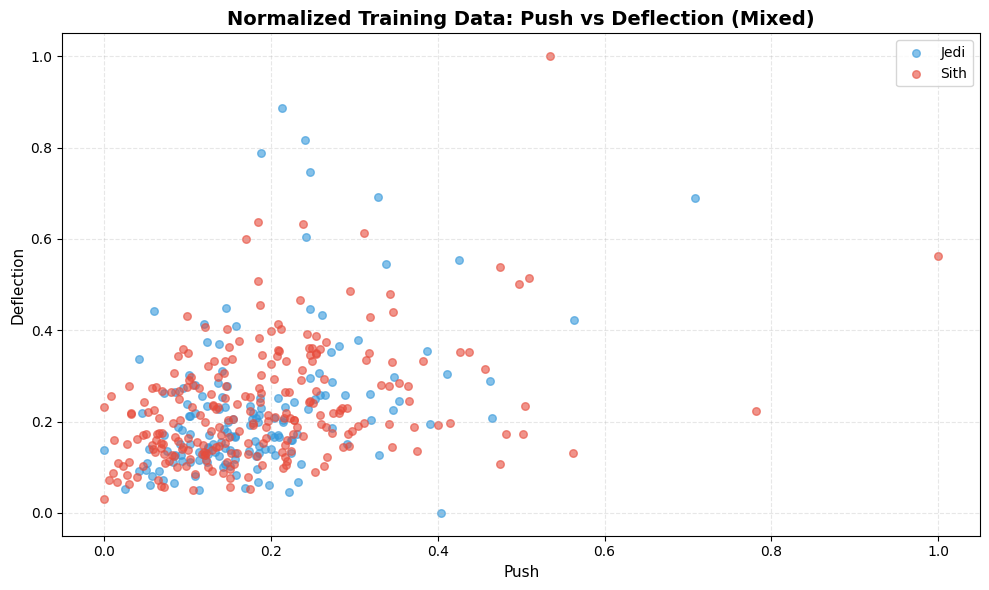

In [8]:
create_scatter_plot(train_normalized, 'Push', 'Deflection', 'Normalized Training Data: Push vs Deflection (Mixed)')

## Summary

- Transforms data to range **[0, 1]**
- Minimum value becomes 0, maximum becomes 1
- Useful when you need bounded values
- Normalization gives bounded scales, unlike standardization (mean 0, unbounded range)